<a href="https://colab.research.google.com/github/PrashantShinagare/EVA5/blob/master/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils

# DATA TRANSFORM (TO TENSOR and OTHER)

In [2]:
data_transforms = transforms.Compose([transforms.ToTensor()])

## LOAD DATASET

In [3]:
train = datasets.MNIST('./', train=True, download=True,transform=data_transforms)
test = datasets.MNIST('./', train=False, download=True, transform=data_transforms)

# X = datasets.load_boston(return_X_y=True)
# transforms.ToTensor(train)
# print(y)

# DATA ARGUMENTS LOADER

In [5]:
batch_size = 64

cuda = torch.cuda.is_available()
# if cuda:
#   torch.cuda.manual_seed(3)

# dataloader arguments
dataloader_args = dict(shuffle = True, batch_size = batch_size, num_workers = 4,pin_memory = True) if cuda else dict(shuffle = True, batch_size = 64)

train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

# Data Stats and Sample DATA

In [ ]:
# Converting Tensor to numpy for the stats and plotting

train_data = train.train_data
n=len(train_data)
train_data = train.transform(train.train_data.numpy())
p=len(train_data)
# print(n)
# print(p)

print("Train")
print(" - Numpy Shape : ", train.train_data.numpy().shape)
print(" - Tensor Shape : ", train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)               # Has train data and arguments such as batch size, shuffle, worker, pin_memory
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Visualize some of the images

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[1].numpy().squeeze(), cmap='gray_r')   # Removes one dimension from the existing dimension Eg: 3 dimension to 2D and 2 dimensional to 1D
# plt.imshow(images[1].numpy().squeeze(), )
print(labels)

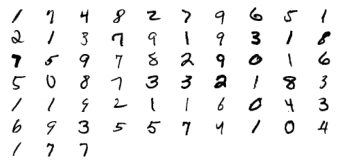

In [47]:
#figure = plt.figure()
num_of_images = 63
for index in range (1, num_of_images+1):
  plt.subplot(10, 10, index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


# BASIC MODEL

# KEEP IT CLOSED

In [ ]:
from sklearn import datasets 
boston = datasets.load_boston()

X = boston.data
# len(X)
# print(X)
y = boston.target
# len(y)
# print(y)

In [ ]:
# X= {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
# y= {0, 0, 0, 1, 0, 1, 1, 0, 0, 1}

Dataset = CustomDataset(torch.FloatTensor(X), torch.FloatTensor(y))

class customdataset(Dataset):

  def __init__ (self, X_data, y_data):
    self.X_data = X_data
    self,y_data = y_data

  def __getitem__ (self, index):
    return self.X_data[index], self.y_data[index]

  def __len__ (self):
    return(len(self.X_data))




In [39]:
m = nn.LogSoftmax()
input = torch.ones(2, 3)
print(input)
output = F.log_softmax(input, dim=1)
print(output)
output_1 = F.log_softmax(input, dim=0)
print(output_1)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[-1.0986, -1.0986, -1.0986],
        [-1.0986, -1.0986, -1.0986]])
tensor([[-0.6931, -0.6931, -0.6931],
        [-0.6931, -0.6931, -0.6931]])


In [1]:
from tqdm import tqdm 

for i in tqdm(range(int(9e6))): 
	pass


100%|██████████| 9000000/9000000 [00:02<00:00, 4272921.00it/s]
